# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
input_column, target_column = fish.columns[1:], fish.columns[0]
fish_input = fish[input_column].values # == .to_numpy()
fish_target = fish[target_column].values

In [4]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

scikit learn에서는 target 걊을 문자로 넣어도 내부에서 숫자로 변환하여 사용하고 결과를 내어 준다 <br> **알파벳 순서대로 label이 지정됨.** <br> kn.classes_ 문자로 변환된 class 리스트 순서 확인 <br>
classes_ 여기서 언더바는 모델에서 학습한 내용 결과를 보여주는 변수이름형식으로 사용됨.

In [7]:
print(kn.classes_), kn.classes_

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


(None,
 array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object))

In [8]:
kn.predict(test_scaled[:5])  # 이름으로 바뀌어서 나옴

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [9]:
proba = kn.predict_proba(test_scaled[:5])  # 각 확률을 보여줌

In [10]:
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


네번째 생선의 경우는 'Perch'일 가능성이 0.6667이고, 'Roach'일 가능성이 0.3333으로 결과가 나옴. 결국 최종은 Perch로 판단함. <br> 저 위에서 n_neighbors=3으로 지정하여 모델을 정의했가 때문에 확률은 0, 1/3, 2/3, 1로 밖에 나오지 않음.

In [11]:
distances, indexes = kn.kneighbors(test_scaled[3:4], n_neighbors=5)
distances, indexes

(array([[0.20774583, 0.24862983, 0.33682411, 0.36163059, 0.36662895]]),
 array([[104, 115, 106,  42,  23]], dtype=int64))

In [12]:
print(train_target[indexes])  # 가까운 이웃 5개중 4개가 perch. 확률: 80%

[['Roach' 'Perch' 'Perch' 'Perch' 'Perch']]


## 로지스틱 회귀

Text(0, 0.5, 'phi')

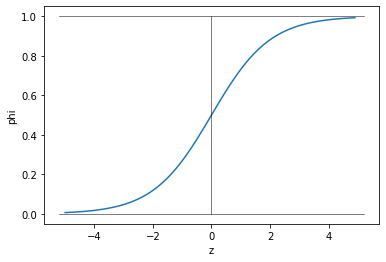

In [13]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.plot([-5.2, 5.2], [1, 1], c='k', linewidth=0.5)
plt.plot([0, 0], [0, 1.], c='k', linewidth=0.5)
plt.plot([-5.2, 5.2], [0, 0], c='k', linewidth=0.5)
plt.xlabel('z')
plt.ylabel('phi')

로지스틱 회귀로 이중 분류 수행하기

In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [17]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [20]:
Weight, Length, Diagonal, Height, Width = 0.91965782, 0.60943175, 0.81041221, 1.85194896, 1.00075672  # scaled된 변환값 입력
x = np.array([Weight, Length, Diagonal, Height, Width]).reshape(5,1)
coef = lr.coef_
z = np.matmul(coef, x) + lr.intercept_
z

array([[-6.02927744]])

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 위 z 값을 계산하여 반환함.

In [22]:
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
from scipy.special import expit # sigmoid함수 계산
print(expit(decisions)) # decision값을 시그모이드에 대입하여 계산함.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


위에서 계산된 predict_proba 결과와 동일함.

### 로지스틱 회귀로 다중 분류 수행하기

L2 norm 규제 내부 동작. C 값으로 규제강화 조정. 올라가면 약하게 하고, 내려가면 강해짐. linearregression Ridge, Lasso의 alpha와 반대로 지정.<br> 규제의 역수로 인식. 기본값: 1

In [24]:
lr = LogisticRegression(C=20, max_iter=1000) # max_iter default 100, 
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [25]:
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)
print(f'train score: {train_score:.4f} \n test score; {test_score:.4f}')

train score: 0.9328 
 test score; 0.9250


In [26]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
print(lr.coef_, lr.intercept_)

[[-1.49003129 -1.02922799  2.59354384  7.70352261 -1.20066865]
 [ 0.19620005 -2.01055961 -3.77985793  6.50489546 -1.99488339]
 [ 3.56277562  6.34363762 -8.4897457  -5.75755723  3.7930993 ]
 [-0.10459208  3.60315022  3.93067151 -3.61728572 -1.75071354]
 [-1.40057602 -6.07506279  5.25966666 -0.8722428   1.86043913]
 [-1.38530137  1.49218754  1.39229417 -5.67731989 -4.40095238]
 [ 0.62152509 -2.32412498 -0.90657255  1.71598756  3.69367954]] [-0.09204741 -0.26290659  3.25100726 -0.147412    2.65494595 -6.78780103
  1.38421383]


클라스마다 선형함수가 하나씩 만들어 짐. 각 클래스마다 2진분류를 7번하여 선형함수를 생성함. <br> 예을 들어 4번째 클라스에서 선형함수를 학습할때는 2진 분류처럼 학습함. 4번째 클라스는 양성클라스로 두고 나머지는 음성클라스로 두고 진행. 대표적인 다중분류의 한 방법 (OvR : One vs. Rest)

7개 분류를 위하여는 sigmoid함수 를 사용하지 않고 softmax함수를 이용

In [28]:
decisions = lr.decision_function(test_scaled[:5])  # Z함수 계산
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


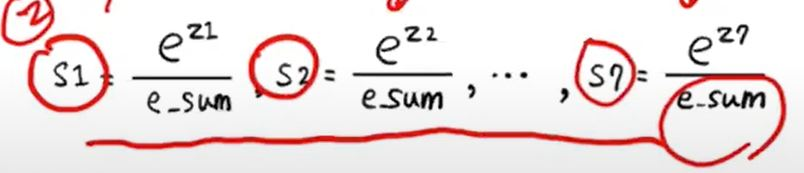

decision_function결과를 이용하여 각각 클라스에 대한 시그모이드함수를 계산. predict_proba()로 도출된 결과와 같은 결과를 보임.

In [29]:
from scipy.special import softmax

In [30]:
proba = softmax(decisions, axis=1)

In [31]:
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
